In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout, Embedding, TimeDistributed, Flatten
# from keras.layers import Conv1D, MaxPooling2D
from keras.layers import Bidirectional
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.normalization import BatchNormalization
import warnings
import pickle
warnings.filterwarnings("ignore")

Using TensorFlow backend.


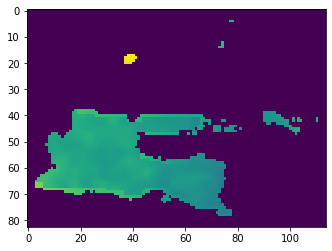

In [11]:
pickle_in = open("../Data_error/error_flatten.pickle","rb")
# data diload sudah dalam bentuk 1D
X = pickle.load(pickle_in)
# untuk menampilkan gambar data 1D -> 2D
plt.imshow(X[0].reshape(83,114))

In [12]:
X

[array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0.,

In [13]:
df = X
data_1 = df[:-48]
data_2 = df[:-36]
data_3 = df[:-24]
data_4 = df[:-12]
data_5 = df
df=df[:-60]

In [14]:
train, test = df[:-12], df[-12:]

In [15]:
np.array(test).shape

(12, 9462)

In [16]:
scaler = MinMaxScaler()
scaler.fit(train)
scaler.fit(data_4)
train = scaler.transform(train)
data_4 = scaler.transform(data_4)
test = scaler.transform(test)
# train = np.array(train)
# test = np.array(test)

In [17]:
y_train = train
train = train.reshape(-1,83,114)

test = test.reshape(-1,83,114)

In [18]:
train.shape

(324, 83, 114)

In [19]:
from keras.layers import Input, Dense, LSTM, MaxPooling1D, Conv1D
from keras.models import Model

input_layer = Input(shape=(train.shape[1],train.shape[2]))
conv1 = Conv1D(filters=32,
               kernel_size=1,
               strides=1,
               activation='relu')(input_layer)

lstm1 = LSTM(32, return_sequences=True)(conv1)
lstm2 = LSTM(64, activation='relu', return_sequences=True)(lstm1)
lstm3 = LSTM(64, activation='relu', return_sequences=False)(lstm2)
dens1 = Dense(128, activation='relu')(lstm3)
dens2 = Dense(128, activation='relu')(dens1)
output_layer = Dense(9462, activation='relu')(dens2)
model = Model(inputs=input_layer, outputs=output_layer)


model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 83, 114)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 83, 32)            3680      
_________________________________________________________________
lstm_1 (LSTM)                (None, 83, 32)            8320      
_________________________________________________________________
lstm_2 (LSTM)                (None, 83, 64)            24832     
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1651

In [20]:
model.compile(optimizer='adagrad', loss='mae', metrics=['mae'])

In [21]:
model.fit(train,y_train, epochs=30, batch_size=12)

Epoch 1/30
324/324 [==============================] - 3s 9ms/step - loss: 311.7643 - mae: 311.7643
Epoch 2/30
324/324 [==============================] - 2s 6ms/step - loss: 0.0136 - mae: 0.0136
Epoch 3/30
324/324 [==============================] - 2s 6ms/step - loss: 0.0110 - mae: 0.0110
Epoch 4/30
324/324 [==============================] - 2s 6ms/step - loss: 0.0102 - mae: 0.0102
Epoch 5/30
324/324 [==============================] - 2s 6ms/step - loss: 0.0101 - mae: 0.0101
Epoch 6/30
324/324 [==============================] - 2s 6ms/step - loss: 0.0098 - mae: 0.0098
Epoch 7/30
324/324 [==============================] - 2s 6ms/step - loss: 0.0098 - mae: 0.0098
Epoch 8/30
324/324 [==============================] - 2s 6ms/step - loss: 0.0096 - mae: 0.0096
Epoch 9/30
324/324 [==============================] - 2s 6ms/step - loss: 0.0094 - mae: 0.0094
Epoch 10/30
324/324 [==============================] - 2s 6ms/step - loss: 0.0095 - mae: 0.0095
Epoch 11/30
324/324 [========================

In [22]:
pred_list = []

batch = train[-12:]

for i in range(0,12):
    pred_list.append(model.predict(batch)[i]) 


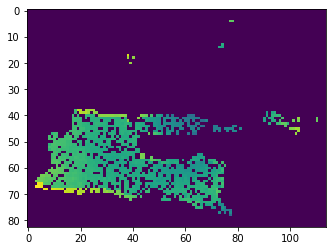

In [23]:
# for i in range(n_input):   
#     pred_list.append(model.predict(batch)[0]) 
#     batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

pred_list = scaler.inverse_transform(pred_list)

# prediksi = (model.predict(batch)[0])

np.array(pred_list).shape
pred = np.array(pred_list).reshape(-1,83,114)
plt.imshow(pred[0])

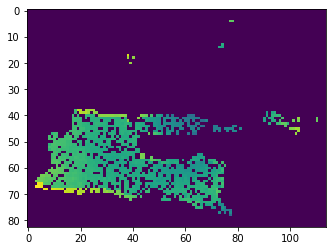

In [24]:
plt.imshow(pred_list[0].reshape(83,114))

In [25]:
train = df



In [26]:
np.array(train).shape

(336, 9462)

In [27]:
scaler = MinMaxScaler()
scaler.fit(train)
# scaler.fit(data_4)
train = scaler.transform(train)
# data_4 = scaler.transform(data_4)
# test = scaler.transform(test)
# train = np.array(train)
# test = np.array(test)

In [28]:
y_train = train
train = train.reshape(-1,83,114)

# test = test.reshape(-1,83,114)

In [29]:
# n_input = 12
# n_features = 9462
# generator = TimeseriesGenerator(train, train, length=n_input, batch_size=12)

In [30]:
model.fit(train,y_train, epochs=2, batch_size=12)

Epoch 1/2
336/336 [==============================] - 2s 6ms/step - loss: 0.0089 - mae: 0.0089
Epoch 2/2
336/336 [==============================] - 2s 6ms/step - loss: 0.0088 - mae: 0.0088


In [31]:
pred_list = []

batch = data_4[-60:-48].reshape((-1, 83, 114))

for i in range(0,12):
    pred_list.append(model.predict(batch)[i])    
    
batch1 = data_4[-48:-36].reshape((-1, 83, 114))

for i in range(0,12):
    pred_list.append(model.predict(batch1)[i])  
    
batch2 = data_4[-36:-24].reshape((-1, 83, 114))

for i in range(0,12):
    pred_list.append(model.predict(batch2)[i]) 
    
batch3 = data_4[-24:-12].reshape((-1, 83, 114))

for i in range(0,12):
    pred_list.append(model.predict(batch3)[i]) 

batch4 = data_4[-12:].reshape((-1, 83, 114))

for i in range(0,12):
    pred_list.append(model.predict(batch4)[i]) 

In [32]:
batch

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [33]:
pred_list = scaler.inverse_transform(pred_list)
pred_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
pred_list.shape

(60, 9462)

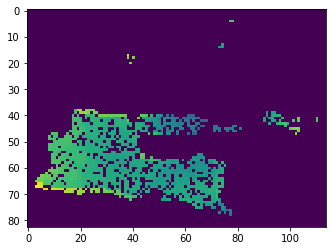

In [35]:
plt.imshow(pred_list[0].reshape(83,114))

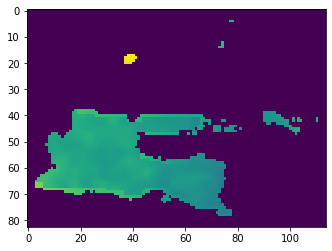

In [36]:
df_asli = data_1
plt.imshow(df_asli[0].reshape(83,114))

In [37]:
max(pred_list[10])

0.018736069046505488

In [38]:
max(df_asli[10])

0.017539296

In [39]:
# MAE untuk semua data
pred_list[pred_list<5]=0
pred_list_new=[]
df_asli_new=[]
no=0
for pred in pred_list:
    pred_list_new.append(list(filter(lambda x: x != 0, pred_list[no])))
    df_asli_new.append(list(filter(lambda x: x != 0, df_asli[no])))
    no+=1
    
pred_list_new=np.array(pred_list_new)
df_asli_new=np.array(df_asli_new)

mae=[]
no=0
for pred1 in pred_list_new:
    mae_ = df_asli_new[no]-pred1
    mae_ = np.average(mae_)
    mae.append(mae_)
    no+=1

ValueError: operands could not be broadcast together with shapes (1840,) (0,) 

In [ ]:
mae

In [ ]:
# pred_list_new

Pred_rata= []
for i in range(0,60):
	Pred_rata.append((pred_list_new[i].mean()))


In [ ]:
df_asli_rata= []
for i in range(0,60):
	df_asli_rata.append((df_asli_new[i].mean()))

In [ ]:
Pred_rata

In [ ]:
df_asli_rata


In [42]:
# membuat index tanggal, agar mempudah dalam proses plotting data
awal = "2012-1"
awal = pd.to_datetime(awal)
from pandas.tseries.offsets import DateOffset
add_dates = [awal + DateOffset(months=x) for x in range(0,60) ]
add_dates

[Timestamp('2012-01-01 00:00:00'),
 Timestamp('2012-02-01 00:00:00'),
 Timestamp('2012-03-01 00:00:00'),
 Timestamp('2012-04-01 00:00:00'),
 Timestamp('2012-05-01 00:00:00'),
 Timestamp('2012-06-01 00:00:00'),
 Timestamp('2012-07-01 00:00:00'),
 Timestamp('2012-08-01 00:00:00'),
 Timestamp('2012-09-01 00:00:00'),
 Timestamp('2012-10-01 00:00:00'),
 Timestamp('2012-11-01 00:00:00'),
 Timestamp('2012-12-01 00:00:00'),
 Timestamp('2013-01-01 00:00:00'),
 Timestamp('2013-02-01 00:00:00'),
 Timestamp('2013-03-01 00:00:00'),
 Timestamp('2013-04-01 00:00:00'),
 Timestamp('2013-05-01 00:00:00'),
 Timestamp('2013-06-01 00:00:00'),
 Timestamp('2013-07-01 00:00:00'),
 Timestamp('2013-08-01 00:00:00'),
 Timestamp('2013-09-01 00:00:00'),
 Timestamp('2013-10-01 00:00:00'),
 Timestamp('2013-11-01 00:00:00'),
 Timestamp('2013-12-01 00:00:00'),
 Timestamp('2014-01-01 00:00:00'),
 Timestamp('2014-02-01 00:00:00'),
 Timestamp('2014-03-01 00:00:00'),
 Timestamp('2014-04-01 00:00:00'),
 Timestamp('2014-05-

In [ ]:
len(add_dates)


In [ ]:
len(Pred_rata)


In [ ]:
len(df_asli_rata)

In [ ]:
dict = {'bulan': add_dates, 'data ':mae}
df = pd.DataFrame(dict)

In [ ]:
df

In [ ]:
df = df.set_index("bulan")
plt.figure(figsize=(20, 5))
plt.plot(df.index,df)

In [ ]:
dict = {'bulan': add_dates, 'data prediksi':Pred_rata, 'data asli':df_asli_rata}
df = pd.DataFrame(dict)
df


In [ ]:
# df_asli = data_4
df = df.set_index("bulan")
plt.figure(figsize=(20, 5))
plt.plot(df.index, df_asli_rata[-60:], color='b', label="observasi")
plt.plot(df.index, Pred_rata[-60:], color='r', label="prediksi")
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

In [ ]:
# # Time series data

# data = mae

 

# # Plot autocorrelation

# plt.acorr(data, maxlags=12)

 

# # Add labels to autocorrelation plot

# plt.title('Autocorrelation of LSTM')

# plt.xlabel('Lag')

# plt.ylabel('Autocorrelation')

 

# # Display the autocorrelation plot

# plt.show()

import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(mae, lags=12 , alpha=0.05)
acf.show()

In [49]:
pacf = smt.graphics.plot_pacf(mae, lags=12 , alpha=0.05)
pacf.show()

NameError: name 'smt' is not defined

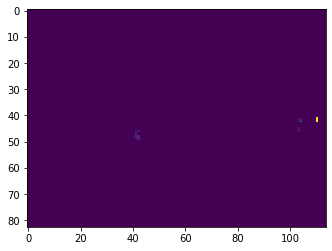

In [48]:
plt.imshow((df_asli[59]-pred_list[59]).reshape(83,114))

In [45]:
from skimage import io
# io.imsave('NewRaster/201201.tif', pred_list[0].reshape(83,114))

In [46]:
pred_list[pred_list==0]=-9999

In [47]:
no=0
for pred in pred_list:
    if(add_dates[no].month<10):
        nama_file = 'Raster/'+str(add_dates[no].year)+'0'+str(add_dates[no].month)+'.tif'
    else:
        nama_file = 'Raster/'+str(add_dates[no].year)+str(add_dates[no].month)+'.tif'
            
    io.imsave(nama_file, pred_list[no].reshape(83,114))
    no+=1
nama_file

'Raster/201612.tif'

In [ ]:
model.save('erro.h5')